In [70]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import metrics

from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier

from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier



import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [71]:
df=pd.read_csv("HRanalytics.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


# EXPLORATORY DATA ANALYSIS

In [72]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [73]:
df['EmployeeCount'].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

In [74]:
#EmployeeCount have same value in all the Dataset so there is no use of this column

#EmployeeNumber is the another column that is not useful so droping this column

In [75]:
df.drop(['EmployeeCount','EmployeeNumber'],axis=1,inplace=True)

In [76]:
df.shape

(1470, 33)

In [77]:
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,-0.012454,NaN,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,0.025873,NaN,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

All Datatype seems to be good appraoch

df.describe()

In [79]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int

There is no null values in the dataset

<AxesSubplot:>

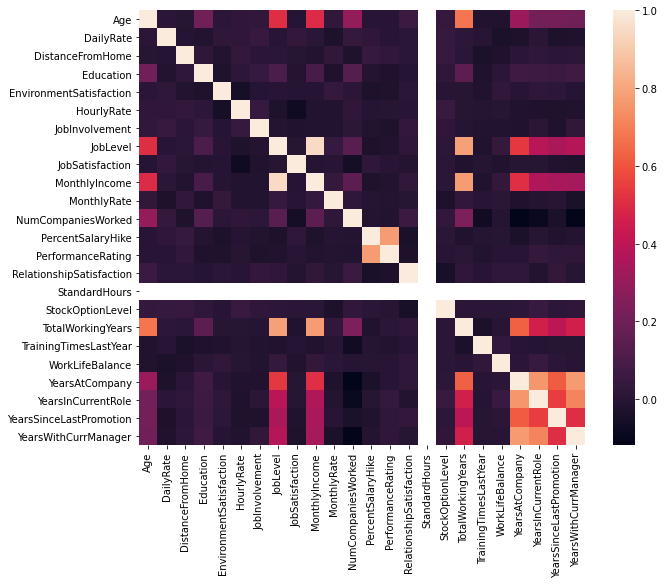

In [80]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


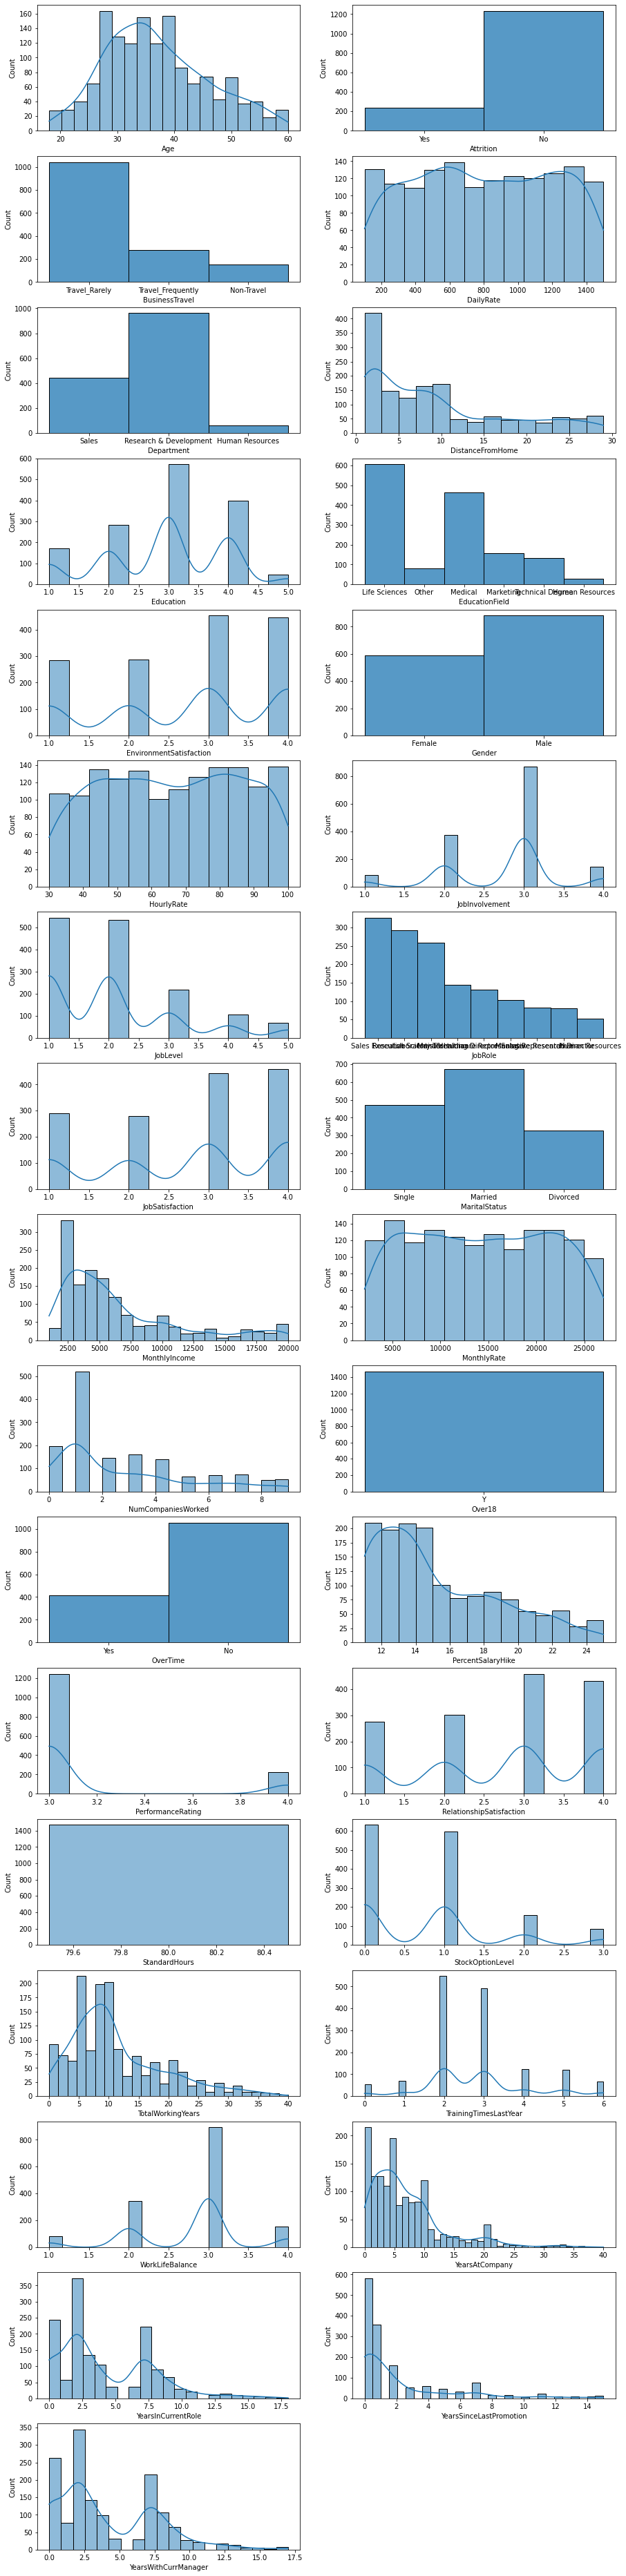

In [81]:
plt.figure(figsize=(15,100))
for i,column_data in enumerate(df.dtypes.items()):
    plt.subplot(25,2,i+1)
    column, dtype = column_data
    if dtype == 'object':
        sns.histplot(df[column])
    else:
        sns.histplot(df[column],kde=True)

from the above dataset we can see that

1-very less normalized data and skewness is present.

2-More no Males are working in the companythen male.

3-most people attend 2 to 3 training last year.

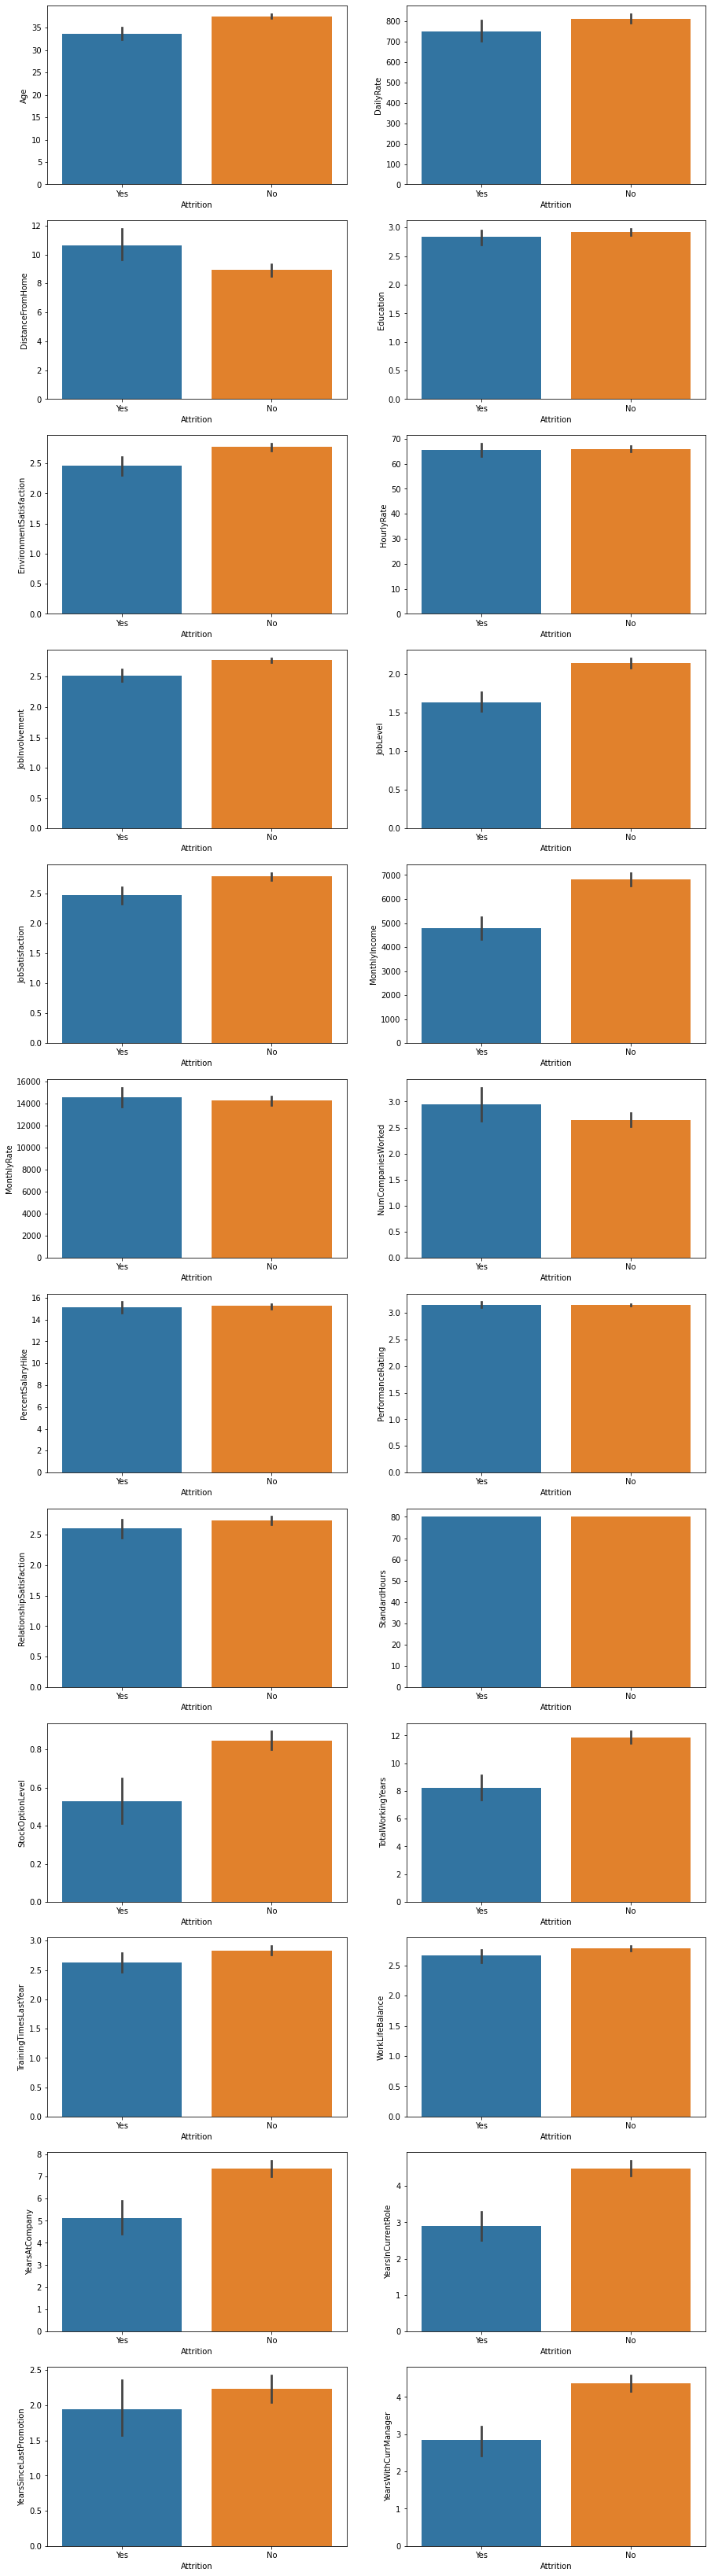

In [82]:
plt.figure(figsize=(15,200))
j = 0
for column, dtype in df.drop('Attrition',axis=1).dtypes.items():

    if dtype != 'object':
        j += 1
        plt.subplot(40,2,j)
        sns.barplot(df['Attrition'],df[column])

After checking the grapgh we can have look

Younger people are leaving more People having less daily rate is leaving more Peopel with higher distance leaving more Higher job leavel peopel are not leaving compnay Years with current manage is lower to leave the company Older employee are note leaving company

In [83]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

# LABEL ENCODER

In [84]:
df = df.apply(LabelEncoder().fit_transform)

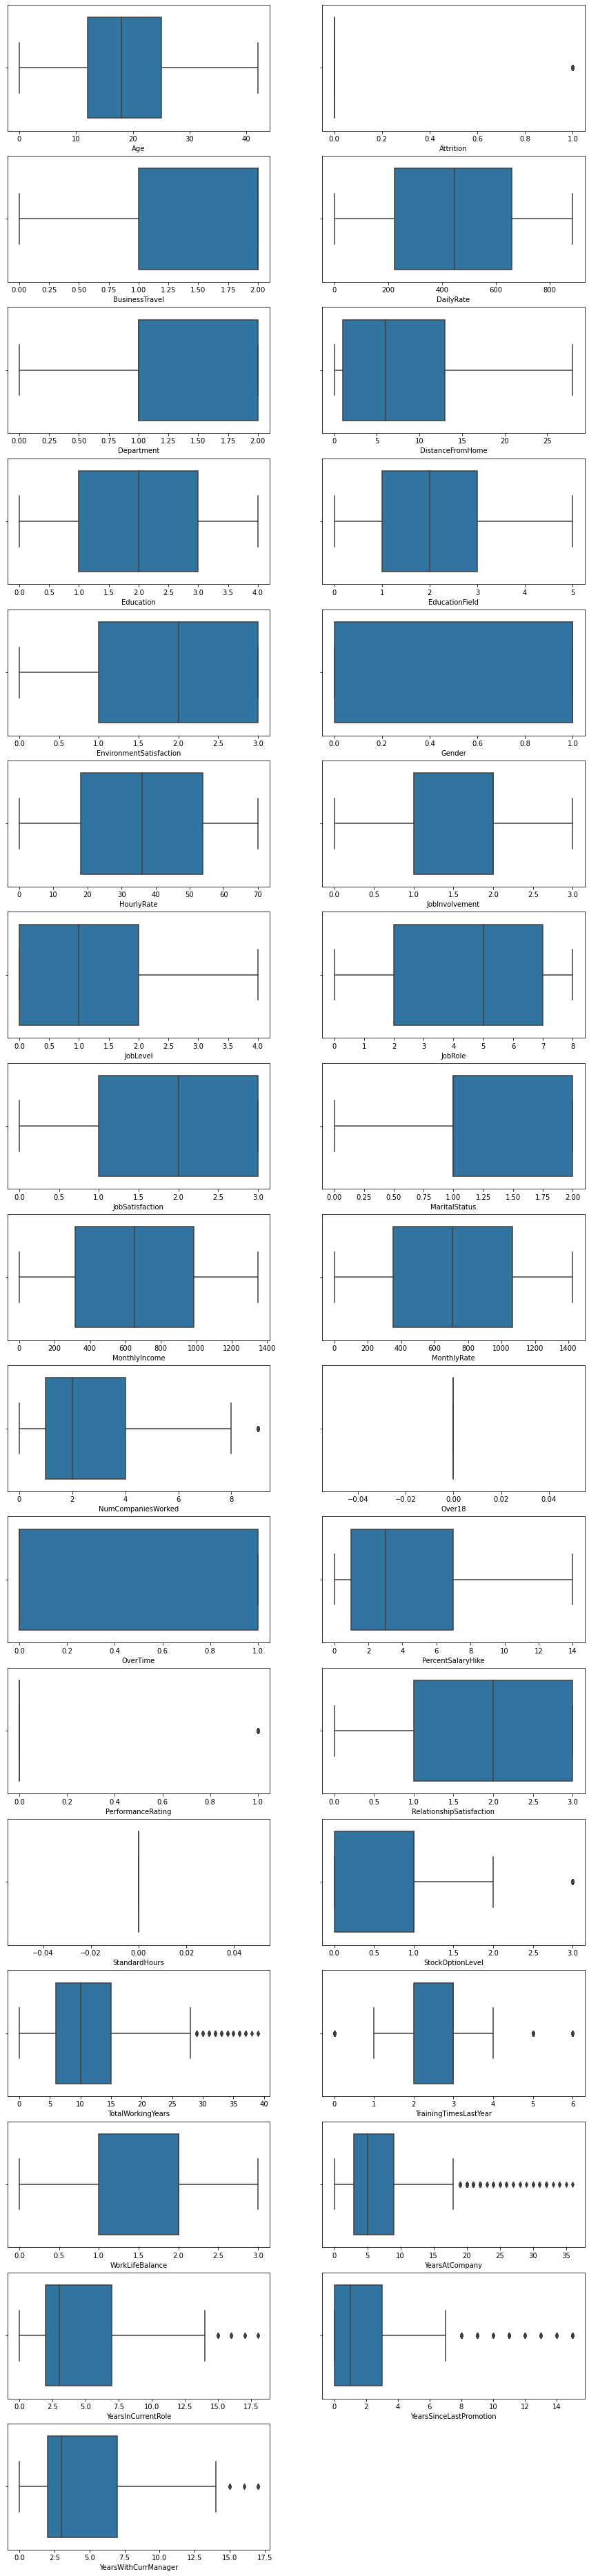

In [85]:
plt.figure(figsize=[15,80])
j = 0
for column,dtype in df.dtypes.items():
    if dtype != 'object':
        j += 1
        plt.subplot(20,2,j)
        sns.boxplot(df[column])

We can see that, There is Lots of Outliers in salary column and few outliers in Number of company workerd,Performance rating, Stock Option Level,TotalWorking Years,Traning time last year,Years at company,Yearsin Current Role, Years ScienceLast Promotation, Years With Curr Manager #### So removing outliers

In [86]:
abs_zscore = np.abs(stats.zscore(df))
abs_zscore

C:\Users\ADMIN\anaconda3\lib\site-packages\scipy\stats\stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


array([[0.4463504 , 2.28090588, 0.59004834, ..., 0.0632959 , 0.67914568,
        0.24583399],
       [1.32236521, 0.4384223 , 0.91319439, ..., 0.76499762, 0.36871529,
        0.80654148],
       [0.008343  , 2.28090588, 0.59004834, ..., 1.16768726, 0.67914568,
        1.15593471],
       ...,
       [1.08667552, 0.4384223 , 0.59004834, ..., 0.61549158, 0.67914568,
        0.31487349],
       [1.32236521, 0.4384223 , 0.91319439, ..., 0.48889978, 0.67914568,
        1.08689522],
       [0.32016256, 0.4384223 , 0.59004834, ..., 0.33939374, 0.36871529,
        0.59522723]])

In [87]:
df[abs_zscore > 3].index

Int64Index([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,
            ...
            1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
           dtype='int64', length=110)

In [88]:
df.drop(df[abs_zscore > 3].index,axis=0,inplace=True)

In [89]:
df['Attrition'].value_counts()

0    1158
1     229
Name: Attrition, dtype: int64

# SPLITING VARIABLE

In [90]:
X = df.drop('Attrition',axis=1)

In [91]:
y = df['Attrition']

In [92]:
df_info = pd.DataFrame()
df_info['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
df_info['columns'] = X.columns
df_info.sort_values('VIF',ascending=False)

C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,VIF,columns
15,18.847721,MonthlyIncome
3,13.827024,Department
28,13.099223,YearsAtCompany
25,12.811362,TotalWorkingYears
11,11.209722,JobLevel
0,9.585697,Age
12,8.500392,JobRole
31,7.833369,YearsWithCurrManager
29,7.325991,YearsInCurrentRole
27,6.774288,WorkLifeBalance


# Checking Skewness

In [93]:
df.skew().abs().sort_values()

StandardHours               0.000000
Over18                      0.000000
DailyRate                   0.012403
MonthlyRate                 0.024344
HourlyRate                  0.030481
MonthlyIncome               0.112326
MaritalStatus               0.160952
Department                  0.183919
Education                   0.289024
RelationshipSatisfaction    0.295686
EnvironmentSatisfaction     0.325285
JobSatisfaction             0.345612
JobRole                     0.386843
Gender                      0.417296
Age                         0.472280
JobInvolvement              0.501401
EducationField              0.544868
WorkLifeBalance             0.557100
TrainingTimesLastYear       0.577614
YearsWithCurrManager        0.694506
YearsInCurrentRole          0.726675
PercentSalaryHike           0.800592
OverTime                    0.954751
DistanceFromHome            0.954752
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
NumCompaniesWorked          1.037715
J

There is a skewness in dataset, So doing PowerTransformation

In [94]:
X_transformed = PowerTransformer().fit_transform(X)
X = pd.DataFrame(X_transformed,columns=X.columns)
X

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.594757,0.638730,0.726329,1.379881,-1.540425,-0.899027,-0.965129,-0.691543,-1.229911,1.305716,...,-1.552370,0.0,-1.084263,-0.173231,-2.608524,-2.152206,0.231837,0.290524,-1.073534,0.582177
1,1.366338,-1.380776,-1.348018,-0.473500,0.253537,-1.781221,-0.965129,0.228695,0.813067,-0.151304,...,1.215498,0.0,0.548653,0.147620,0.217074,0.280173,0.948319,1.006575,0.193168,1.018073
2,0.172771,0.638730,1.320068,-0.473500,-1.001294,-0.899027,1.239552,1.190375,0.813067,1.223844,...,-0.670166,0.0,-1.084263,-0.351153,0.217074,0.280173,-2.156089,-1.571814,-1.073534,-1.528426
3,-0.282470,-1.380776,1.367537,-0.473500,-0.659936,1.097612,-0.965129,1.190375,-1.229911,-0.399824,...,0.257322,0.0,-1.084263,-0.173231,0.217074,0.280173,0.621429,1.006575,1.027520,-1.528426
4,-1.057071,0.638730,-0.428653,-0.473500,-1.001294,-1.781221,0.689982,-1.551541,0.813067,-1.296053,...,1.215498,0.0,0.548653,-0.544046,0.217074,0.280173,-0.933983,-0.390769,0.722874,-0.347871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,0.062449,-1.380776,0.270488,-0.473500,1.393324,-0.899027,0.689982,0.228695,0.813067,-1.233159,...,0.257322,0.0,0.548653,1.039364,0.217074,0.280173,0.003289,-0.390769,-1.073534,0.018680
1383,0.387378,0.638730,-0.367458,-0.473500,-0.027947,-1.781221,0.689982,1.190375,0.813067,-1.171565,...,-1.552370,0.0,0.548653,-0.007630,1.606919,0.280173,0.436162,1.006575,0.193168,1.018073
1384,-1.057071,0.638730,-1.799916,-0.473500,-0.405306,0.069095,-0.965129,-0.691543,0.813067,1.016250,...,-0.670166,0.0,0.548653,-0.544046,-2.608524,0.280173,0.231837,-0.390769,-1.073534,0.018680
1385,1.366338,-1.380776,0.571762,1.379881,-1.001294,0.069095,0.689982,1.190375,0.813067,-0.054677,...,1.215498,0.0,-1.084263,1.039364,0.217074,-1.119185,0.791264,0.793764,-1.073534,1.205782


# TRAIN TEST SPLIT

In [95]:
X_train, X_test,y_train,y_test = train_test_split(X,y,random_state=42,shuffle=True)

Model Performing

# LOGISTIC REGRESSION

In [96]:
logisticRegression = LogisticRegression()

In [97]:
logisticRegression.fit(X_train,y_train)

LogisticRegression()

In [98]:
y_pred = logisticRegression.predict(X_test)
y_pred_proba = logisticRegression.predict_proba(X_test)[::,1]

In [99]:
metrics.accuracy_score(y_test,y_pred)

0.8472622478386167

In [100]:
metrics.confusion_matrix(y_test,y_pred)

array([[269,  13],
       [ 40,  25]], dtype=int64)

In [101]:
fpr, tpr , _ = metrics.roc_curve(y_test,y_pred_proba)

In [102]:
auc = metrics.roc_auc_score(y_test,y_pred_proba)
print('auc:',auc)

auc: 0.7939443535188216


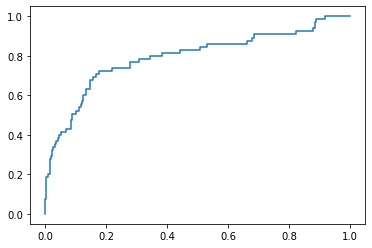

In [103]:
plt.plot(fpr,tpr)

In [104]:
kFold = KFold(n_splits=10,shuffle=True,random_state=42)
np.mean(cross_val_score(LogisticRegression(),X,y,cv=kFold,scoring='accuracy',n_jobs=1))

0.8723542904806589

# DECISION TREE CLASSIFIER

In [105]:
decisionTreeClassifier = DecisionTreeClassifier()

In [106]:
decisionTreeClassifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [107]:
y_pred = decisionTreeClassifier.predict(X_test)
y_pred_proba = decisionTreeClassifier.predict_proba(X_test)[::,1]

In [108]:
metrics.accuracy_score(y_test,y_pred)

0.7953890489913544

In [109]:
metrics.confusion_matrix(y_test,y_pred)

array([[251,  31],
       [ 40,  25]], dtype=int64)

In [110]:
fpr,tpr,_ = metrics.roc_curve(y_test,y_pred_proba)

In [111]:
metrics.roc_auc_score(y_test,y_pred_proba)

0.6373431533006001

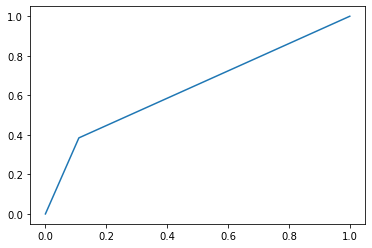

In [112]:
plt.plot(fpr,tpr)

In [113]:
print('CV score:',np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=kFold,scoring='accuracy',n_jobs=-1)))

CV score: 0.7771765196538423


# Support Vector Classifier

In [114]:
svc = SVC(probability=True)

In [115]:
svc.fit(X_train,y_train)

SVC(probability=True)

In [116]:
y_pred = svc.predict(X_test)
y_pred_proba = svc.predict_proba(X_test)[::,1]

In [117]:
metrics.accuracy_score(y_test,y_pred)

0.8530259365994236

In [118]:
metrics.confusion_matrix(y_test,y_pred)

array([[278,   4],
       [ 47,  18]], dtype=int64)

In [119]:
fpr,tpr,_ = metrics.roc_curve(y_test,y_pred_proba)

In [120]:
metrics.roc_auc_score(y_test,y_pred_proba)

0.8002182214948173

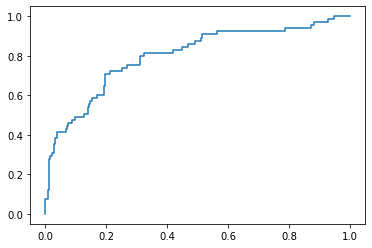

In [121]:
plt.plot(fpr,tpr)

In [122]:
print('CV score',np.mean(cross_val_score(SVC(),X,y,cv=kFold,scoring='accuracy',n_jobs=-1)))

CV score 0.8665571890313837


# KNEIGHBORS CLASSIFIER

In [123]:
kNeighborsClassifier = KNeighborsClassifier()

In [124]:
kNeighborsClassifier.fit(X_train,y_train)

KNeighborsClassifier()

In [125]:
y_pred = kNeighborsClassifier.predict(X_test)
y_pred_proba = kNeighborsClassifier.predict_proba(X_test)[::,1]

In [126]:
metrics.accuracy_score(y_test,y_pred)

0.8242074927953891

In [127]:
metrics.confusion_matrix(y_test,y_pred)

array([[279,   3],
       [ 58,   7]], dtype=int64)

In [128]:
fpr,tpr,_ = metrics.roc_curve(y_test,y_pred_proba)

In [129]:
metrics.roc_auc_score(y_test,y_pred_proba)

0.645771958537916

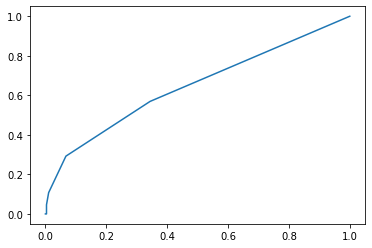

In [130]:
plt.plot(fpr,tpr)

In [131]:
print('CV score:',np.mean(cross_val_score(KNeighborsClassifier(),X,y,cv=kFold,scoring='accuracy',n_jobs=-1)))

CV score: 0.8413460535919091


# Best model is SVC with 85% score

In [132]:
param_grid = {
    'C': [1, 10, 100], 
    'kernel': ('linear', 'rbf'),
    'shrinking':[True,False],
    'probability': [True,False],
    
}
gridSearchCV = GridSearchCV(SVC(probability=True),param_grid=param_grid,n_jobs=-1)

In [133]:
gridSearchCV.fit(X_train,y_train)

GridSearchCV(estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [1, 10, 100], 'kernel': ('linear', 'rbf'),
                         'probability': [True, False],
                         'shrinking': [True, False]})

In [134]:
gridSearchCV.best_score_

0.8798076923076923

In [135]:
gridSearchCV.best_params_

{'C': 10, 'kernel': 'linear', 'probability': True, 'shrinking': True}

In [136]:
scores = cross_val_score(
    SVC(C=1,kernel='linear',probability=True,shrinking=True),
    X,
    y,
    cv=kFold,
    scoring='accuracy',
    n_jobs=-1
)

In [137]:
print('score: ',np.mean(scores))
print('std',np.std(scores))

score:  0.8708998018976123
std 0.030354648191074158


# Saving The Model

In [138]:
pickle.dump(svc,open('svc.pkl','wb'))